In [1]:
!wget -O t.jpg  https://th.bing.com/th/id/R.1ffd88773b2492142eb373e343033761?rik=4QnCzGu1sFWjSw&pid=ImgRaw&r=0

In [2]:
!pip install git+https://github.com/huggingface/diffusers

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-6v15ncdz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-6v15ncdz
  Resolved https://github.com/huggingface/diffusers to commit ce5504934ac484fca39a1a5434ecfae09eabdf41
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 16.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.18.0.dev0-py3-none-any.whl size=1084334 sha256=45b8eb367ee40c9e0044e185d223dee9cce3d8a539ee7

In [3]:
!pip install transformers accelerate

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 45.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 6.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 21.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install git+https://github.com/facebookresearch/segment-anything

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Cloning https://github.com/facebookresearch/segment-anything to /tmp/pip-req-build-k4traht9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything /tmp/pip-req-build-k4traht9
  Resolved https://github.com/facebookresearch/segment-anything to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=af6aaa843b27d0a5f029e92dbda223285d4ebde150911696fa244ad963971e0e
  Stored in directory: /tmp/pip-ephem-wheel-cache-x_y03tes/wheels/7b/71/06/caa88049351430c702029c57253439fc6c30c1d68f81eefd24
Successfully built segment-anything


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
def drawMask(mask, size):
        matrix = mask['segmentation']
        img = Image.new('RGBA',size, color = (255, 255, 255, 0))
        
        for x in range(size[0]):
            for y in range(size[1]):
                if matrix[y][x]:
                    img.putpixel((x,y), (0,0,0,255))
                    
        return img

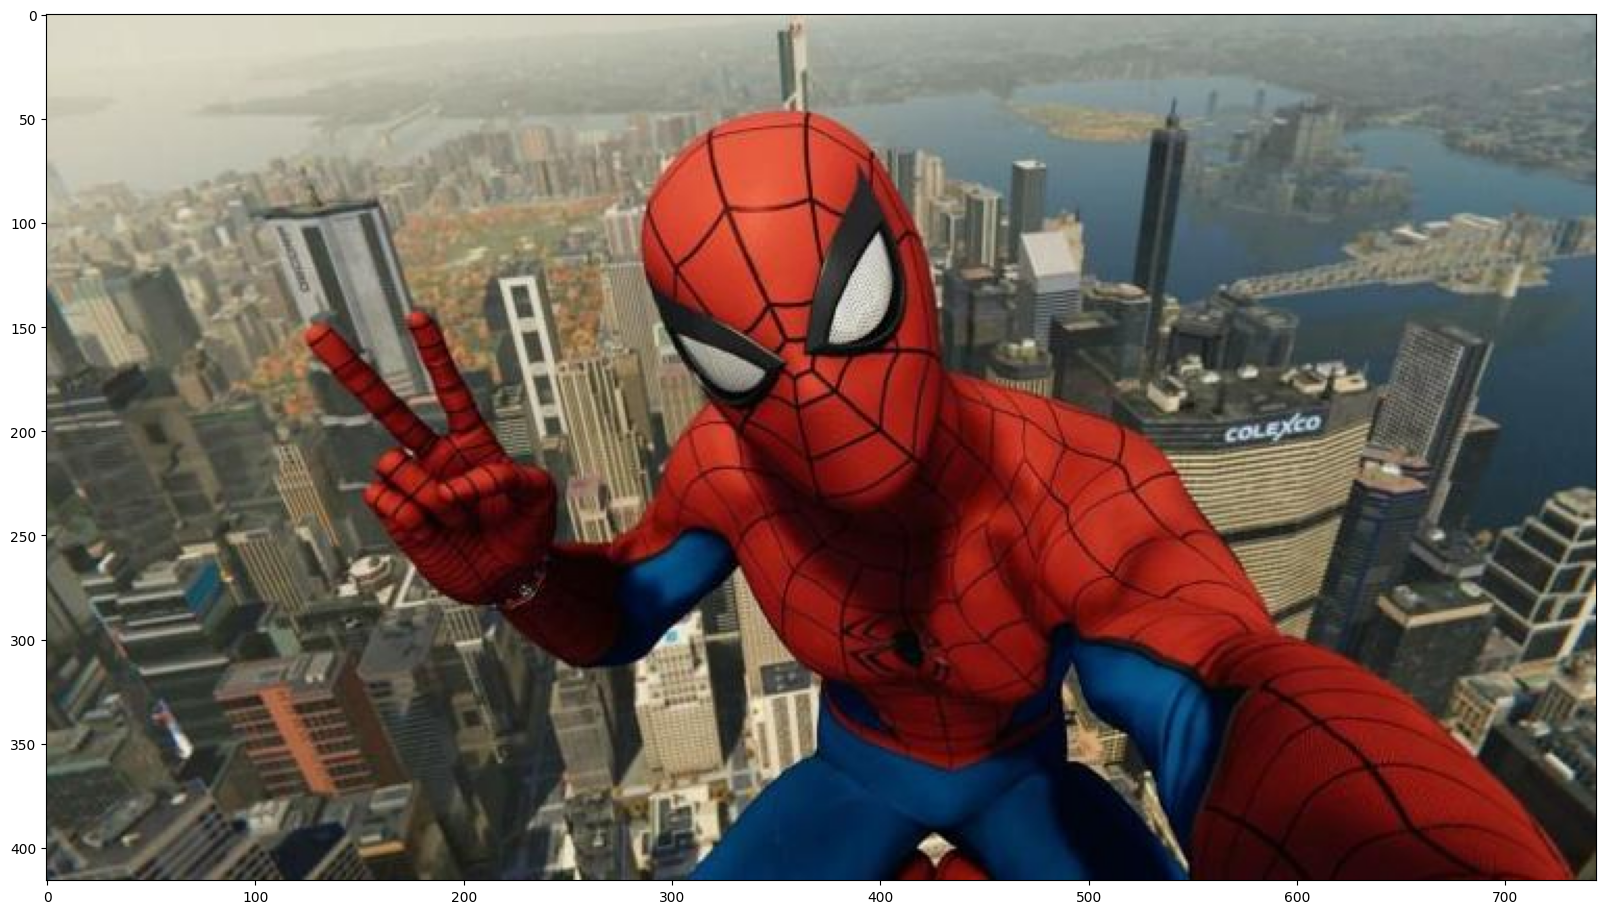

In [3]:
# 处理图片

init_image=Image.open("./works/spider.jpg")
(w,h) = init_image.size
(w,h) = (w-w%8,h-h%8)
init_image = init_image.resize((w,h))
init_image.save('./works/spider_init.jpg')




import cv2
image = cv2.imread('./works/spider_init.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('on')
plt.show()

In [4]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "../models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

In [5]:
masks = mask_generator.generate(image)

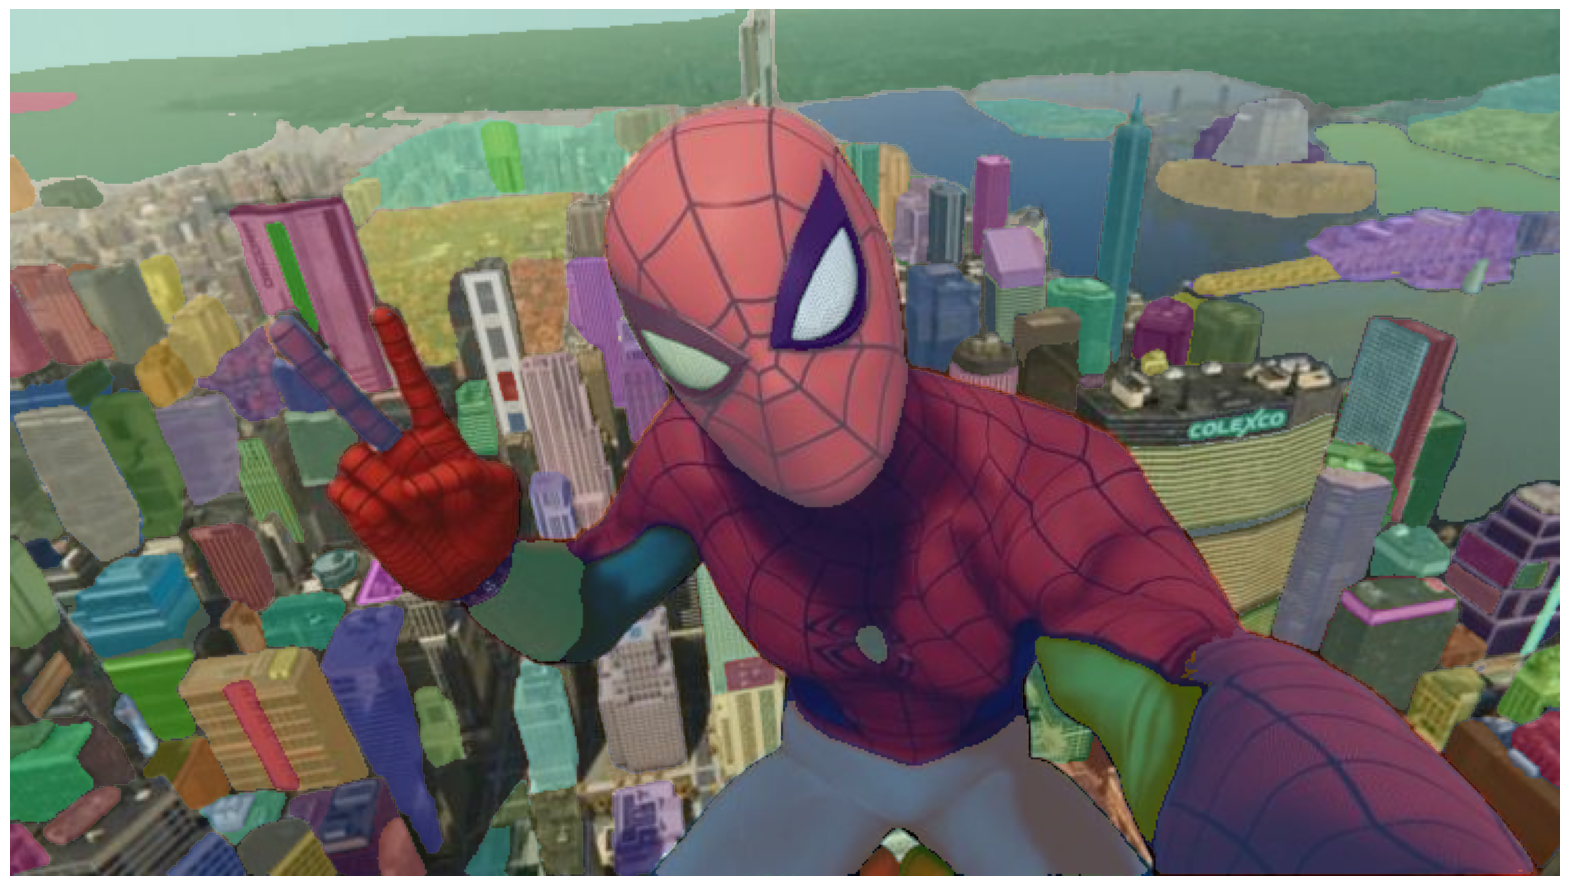

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [6]:
mask0 = masks[1]
sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=True)
w = mask0["crop_box"][2]
h = mask0["crop_box"][3]
print(w, h)

images=[]
for (i,mask) in enumerate(sorted_anns):
    mask_img = drawMask(mask, (w, h))
    mask_img.save("./masks/" + str(i) + ".png")
    images.append((mask_img, str(i)))

744 416


In [7]:
def display_images(images=None, columns=6, width=100, height=100):
    plt.figure(figsize=(width, height))
    for i, (image, text) in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.axis('off')
        plt.text(10, 10, text, fontsize=32, bbox=dict(facecolor='red', alpha=0.5))
        plt.imshow(image)
        
display_images(images)

In [9]:
from functools import reduce
def merge_images(images):
    return reduce(Image.alpha_composite, images)

def merge_by_id(*args):
    images = []
    for arg in args:
        # print(arg)
        images.append(Image.open('./masks/'+ str(arg) +'.png'))
    last_mask = merge_images(images)
    xpath = "./works/spider_mask.png"
    last_mask.save(xpath)
    return Image.open(xpath)

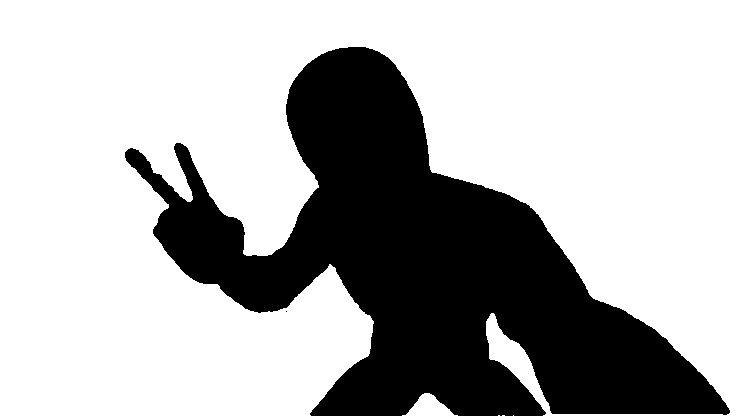

In [11]:
args = [0, 2, 3, 6, 7, 9]
merge_by_id(*args)

# merge_by_id(**)

# xargs = []
# [**range(12, 39)]
# args =
# merge_by_id(*[*range(12, 39)])

# argx = [*range(12, 40)]
# type(argx)
# merge_by_id(*argx)